In [1]:
#@title Dependencies

print("Load dependencies - START")
!pip install qrcode > /dev/null 2>&1
!pip install memory_profiler > /dev/null 2>&1

import time
import random
import matplotlib.pyplot as plt
import numpy as np
import qrcode
from PIL import Image
import tracemalloc
import matplotlib.ticker as ticker

print("Load dependencies - END")

Load dependencies - START
Load dependencies - END


In [2]:
#@title Utils

# Función para generar todos los subconjuntos de un conjunto dado
def generar_subconjuntos(conjunto):
    subconjuntos = [[]]
    for elemento in conjunto:
        nuevos_subconjuntos = [subconjunto + [elemento] for subconjunto in subconjuntos]
        subconjuntos.extend(nuevos_subconjuntos)
    return subconjuntos

<ipython-input-3-cf730fbd6875>:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


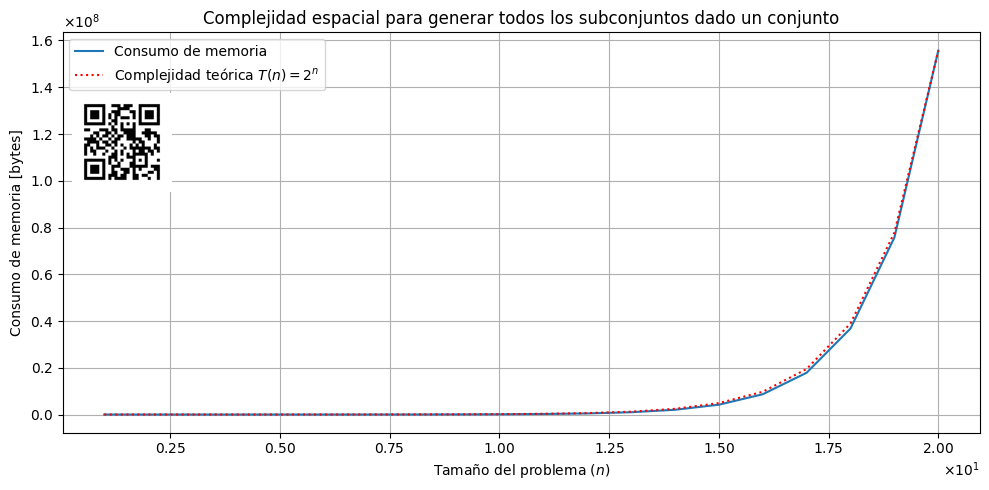

In [3]:
# Lista de tamaños de problema para probar
tamanos_problema = np.arange(1, 21, 1)

# Inicializar arrays para los tamaños de memoria
memoria_subconjuntos = np.zeros(len(tamanos_problema))

average = 5

# Medir el tamaño de memoria para cada tamaño de problema
for i, n in enumerate(tamanos_problema):
    memoria_subconjuntos_n = np.zeros(average)
    for j in range(average):
        conjunto = list(range(n))
        tracemalloc.start()
        subconjuntos = generar_subconjuntos(conjunto)
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        memoria_subconjuntos_n[j] = peak
    memoria_subconjuntos[i] = np.mean(memoria_subconjuntos_n)

# Generar el código QR
qr_data = "https://bit.ly/4dFXmcV"
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(qr_data)
qr.make(fit=True)
qr_img = qr.make_image(fill_color='black', back_color='white')

# Guardar la imagen del código QR
qr_img_path = "codigo_qr.png"
qr_img.save(qr_img_path)

# Cargar la imagen del código QR con PIL
qr_img_pil = Image.open(qr_img_path)

# Convertir la imagen de PIL a un formato que matplotlib puede manejar
qr_img_np = np.array(qr_img_pil)

# Graficar los resultados
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

# Gráfica: Memoria usada por el problema de los subconjuntos
ax1.plot(tamanos_problema, memoria_subconjuntos, label='Consumo de memoria')

# Agregar la línea T(n) = O(2^n)
n_exp = 2 ** tamanos_problema
# Escalar n_exp para ajustarse a la escala de memoria_subconjuntos
n_exp_scaled = n_exp * (memoria_subconjuntos[-1] / n_exp[-1])
ax1.plot(tamanos_problema, n_exp_scaled, label='Complejidad teórica $T(n) = 2^n$', linestyle='dotted', color='red')

ax1.set_xlabel('Tamaño del problema ($n$)')
ax1.set_ylabel('Consumo de memoria [bytes]')
ax1.set_title('Complejidad espacial para generar todos los subconjuntos dado un conjunto')
ax1.legend(loc='upper left')
ax1.grid(True)

# Formatear los ejes x e y en notación científica
ax1.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Insertar la imagen del código QR en la gráfica
qr_position = [0.077, 0.58, 0.1, 0.25]
ax_inset = fig.add_axes(qr_position)
ax_inset.imshow(qr_img_np, cmap='gray')
ax_inset.axis('off')

plt.tight_layout()
plt.show()

# Guardar la figura con 300 DPI
fig.savefig('complejidad_espacial_exponencial.png', dpi=300)